In [1]:
__author__ = 'dp1618'
import os
import numpy as np
import pylab as pl

from scipy.optimize import curve_fit, minimize
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#distributions  will be chi2, normal, poisson, binomial, laplace, 
# and logistic
#mean will be equal to 100


#degrees of freedom is the same as the mean for the chi2 distribution
df = 100
#loc is the same as the mean for the normal, logistic and laplace 
#distributions
loc = 100
#lamda is the mean of a poisson distribution
lamda = 100
#nbinomial*pbinomial is the mean of the binomial distribution
#use the random function to provide a value of pbinomial
#find nbinomial based on the value of pbinomial
pbinomial = np.random.rand()
nbinomial = 100/pbinomial
#generate a random value for scale or standard deviation for the 
#normal and laplace distributions
scale = np.random.rand()

In [3]:
#create an empty dictionary to hold the different distributions and 
#their arrays
md = {}
#add an object for the chi2 distribution with df degrees of freedom and a 
#size of 100 
md['chi2'] = np.random.chisquare(df, size = 100)
#add an object for the normal distribution with a mean of loc, standard
#deviation of 10 and a size of 100 
md['norml'] = np.random.normal(loc, scale, size = 100)
#add an object for the poisson distribution with a mean of lamda
# and a size of 100 
md['poisson'] = np.random.poisson(lamda, size = 100)
#add an object for the binomial distribution with a mean of 100 
# and a size of 100 
md['binomial'] = np.random.binomial(nbinomial, pbinomial, size = 100)
#add an object for the laplace distribution with a mean of 100, a scale 
#of "scale" and size of 100
md['laplace'] = np.random.laplace(loc, scale, size = 100)
#add an object for the logistic distribution with a mean of 100 (loc)
#, a scale of "scale" and size of 100
md['logistic'] = np.random.logistic(loc, scale, size = 100)

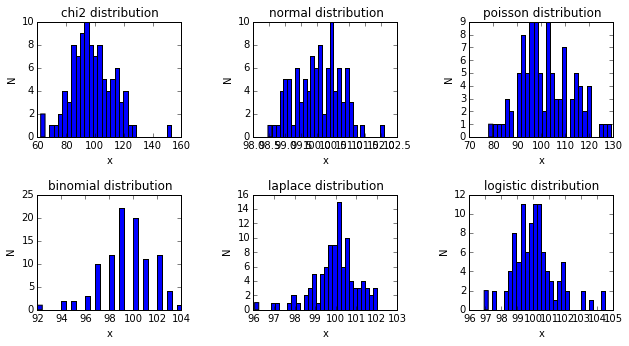

In [4]:
#plot a histogram for each distribution
pl.figure(figsize=(10,5))
#plot a histogram of the chi2 distribution
pl.subplot(231)
pl.hist(md['chi2'], bins = 30)
pl.ylabel('N')
pl.xlabel('x') 
pl.title('chi2 distribution')

#plot a histogram of the normal distribution
pl.subplot(232)
pl.hist(md['norml'], bins = 30)
pl.ylabel('N')
pl.xlabel('x') 
pl.title('normal distribution')

#plot a histogram of the poisson distribution
pl.subplot(233)
pl.hist(md['poisson'], bins = 30)
pl.ylabel('N')
pl.xlabel('x') 
pl.title('poisson distribution')

#plot a histogram of the binomial distribution
pl.subplot(234)
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x') 
pl.title('binomial distribution')

#plot a histogram of the laplace distribution
pl.subplot(235)
pl.hist(md['laplace'], bins = 30)
pl.ylabel('N')
pl.xlabel('x') 
pl.title('laplace distribution')

#plot a histogram of the logistic distribution
pl.subplot(236)
pl.hist(md['logistic'], bins = 30)
pl.ylabel('N')
pl.xlabel('x') 
pl.title('logistic distribution')

#adjust the plots
pl.subplots_adjust(wspace=0.5,hspace=0.5,
                  left=0.1, right=0.9,
                  top=0.9, bottom=0.1)


In [5]:
#print the mean and standard deviation of the samples
print ('The chi2 mean is %.2f and the chi2 standard deviation is %.2f' 
       %(md['chi2'].mean(), md['chi2'].std()))
print ('The normal mean is %.2f and the normal standard deviation is %.2f' 
       %(md['norml'].mean(), md['norml'].std()))
print ('The poisson mean is %.2f and the poisson standard deviation' 
       ' is %.2f' %(md['poisson'].mean(), md['poisson'].std()))
print ('The binomial mean is %.2f and the binomial standard deviation' 
       ' is %.2f' %(md['binomial'].mean(), md['binomial'].std()))
print ('The laplace mean is %.2f and the laplace standard deviation' 
       ' is %.2f' %(md['laplace'].mean(), md['laplace'].std()))
print ('The logistic mean is %.2f and the logistic standard deviation' 
       ' is %.2f' %(md['logistic'].mean(), md['logistic'].std()))

The chi2 mean is 98.00 and the chi2 standard deviation is 14.71
The normal mean is 100.00 and the normal standard deviation is 0.71
The poisson mean is 101.80 and the poisson standard deviation is 10.63
The binomial mean is 99.33 and the binomial standard deviation is 2.15
The laplace mean is 99.97 and the laplace standard deviation is 1.06
The logistic mean is 100.08 and the logistic standard deviation is 1.34


In [6]:
#create an array of 100 integers between 10 and 2000
mysize = 2000/(np.array(range(1,100)+[10]))
#provide a random scale or standard deviation to be used for all 
#distributions that require a scale/standard deviation as an input
scale = 50*(np.random.rand())

In [7]:
#overwrite the md entry for 'chi2'
md['chi2'] = {}
#use a for loop to create a nested dictionary 
for n in mysize:
    md['chi2'][n] = np.random.chisquare(df, size = n)

In [8]:
#overwrite the md entry for 'normal'
md['norml'] = {}
#use a for loop to create a nested dictionary 
for n in mysize:
    md['norml'][n] = np.random.normal(loc, scale, size = n)

In [9]:
#overwrite the md entry for 'poisson'
md['poisson'] = {}
#use a for loop to create a nested dictionary 
for n in mysize:
    md['poisson'][n] = np.random.poisson(lamda, size = n)

In [10]:
#overwrite the md entry for 'binomial'
md['binomial'] = {}
#use a for loop to create a nested dictionary 
for n in mysize:
    md['binomial'][n] = np.random.binomial(nbinomial, pbinomial, size = n)

In [11]:
#overwrite the md entry for 'laplace'
md['laplace'] = {}
#use a for loop to create a nested dictionary 
for n in mysize:
    md['laplace'][n] = np.random.laplace(loc, scale, size = n)

In [12]:
#overwrite the md entry for 'logistic'
md['logistic'] = {}
#use a for loop to create a nested dictionary 
for n in mysize:
    md['logistic'][n] = np.random.logistic(loc, scale, size = n)

In [13]:
#create an dictionary of means
means = {}

#create an entry in means for each distribution
means['chi2'] = {}
means['norml'] = {}
means['poisson'] = {}
means['binomial'] = {}
means['laplace'] = {}
means['logistic'] = {}

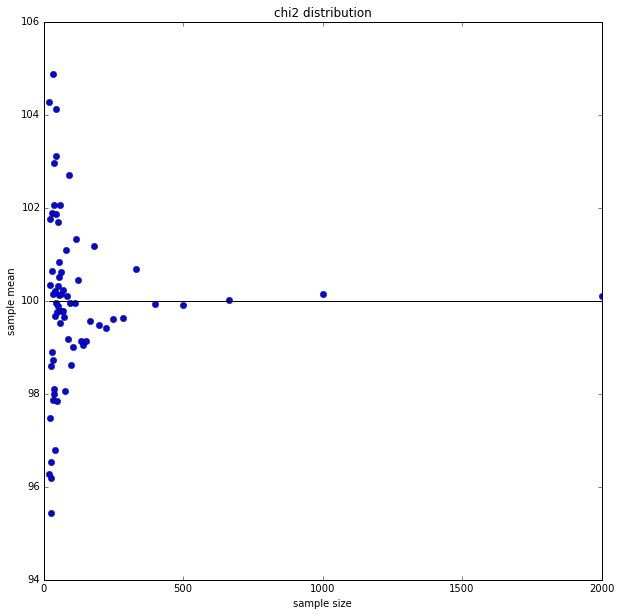

In [14]:
#plot the means for chi2
fig_mu_N = pl.figure(figsize = (10,10))
axchi2_mu_n = fig_mu_N.add_subplot(111)
for nn in md['chi2'].iterkeys():
    means['chi2'][nn] = md['chi2'][nn].mean()
    axchi2_mu_n.plot(nn, means['chi2'][nn], 'ob')
    axchi2_mu_n.set_xlabel('sample size')
    axchi2_mu_n.set_ylabel('sample mean')
    axchi2_mu_n.set_title('chi2 distribution')
    axchi2_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

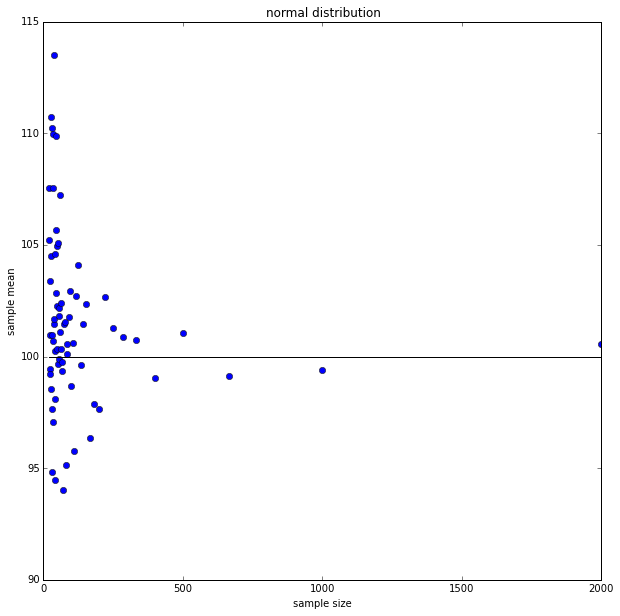

In [15]:
#plot the means for normal
fig_mu_N1 = pl.figure(figsize = (10,10))
axnormal_mu_n = fig_mu_N1.add_subplot(111)
for nn in md['norml'].iterkeys():
    means['norml'][nn] = md['norml'][nn].mean()
    axnormal_mu_n.plot(nn, means['norml'][nn], 'ob')
    axnormal_mu_n.set_xlabel('sample size')
    axnormal_mu_n.set_ylabel('sample mean')
    axnormal_mu_n.set_title('normal distribution')
    axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

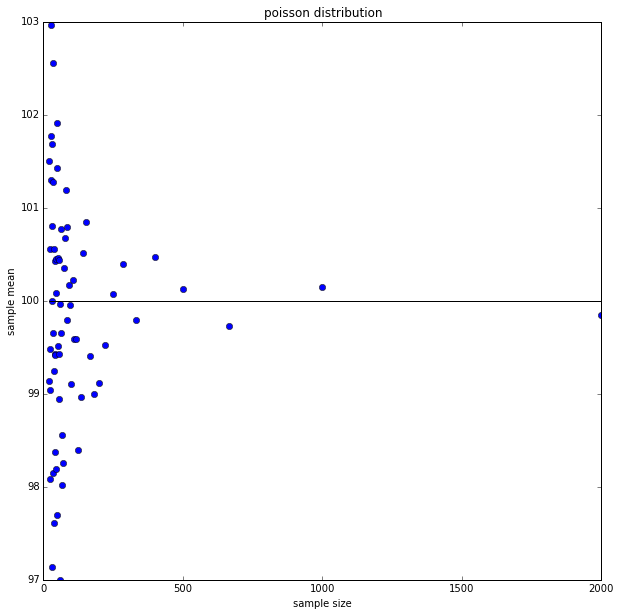

In [16]:
#plot the means for poisson
fig_mu_N2 = pl.figure(figsize = (10,10))
axpoisson_mu_n = fig_mu_N2.add_subplot(111)
for nn in md['poisson'].iterkeys():
    means['poisson'][nn] = md['poisson'][nn].mean()
    axpoisson_mu_n.plot(nn, means['poisson'][nn], 'ob')
    axpoisson_mu_n.set_xlabel('sample size')
    axpoisson_mu_n.set_ylabel('sample mean')
    axpoisson_mu_n.set_title('poisson distribution')
    axpoisson_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

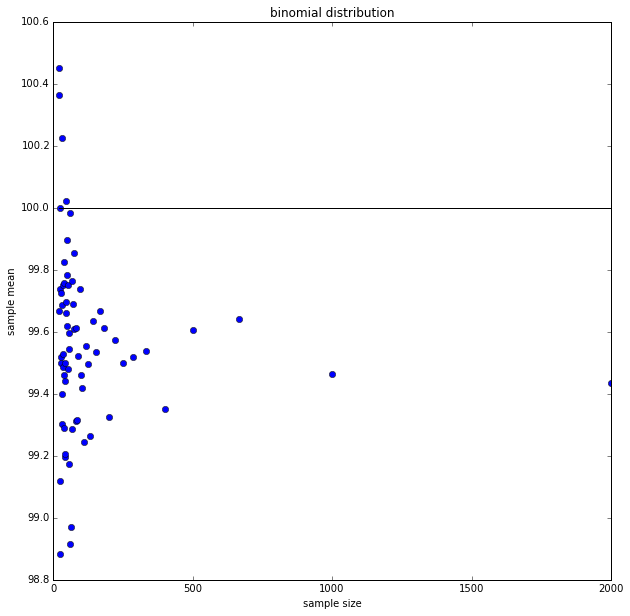

In [17]:
#plot the means for binomial
fig_mu_N3 = pl.figure(figsize = (10,10))
axbinomial_mu_n = fig_mu_N3.add_subplot(111)
for nn in md['binomial'].iterkeys():
    means['binomial'][nn] = md['binomial'][nn].mean()
    axbinomial_mu_n.plot(nn, means['binomial'][nn], 'ob')
    axbinomial_mu_n.set_xlabel('sample size')
    axbinomial_mu_n.set_ylabel('sample mean')
    axbinomial_mu_n.set_title('binomial distribution')
    axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

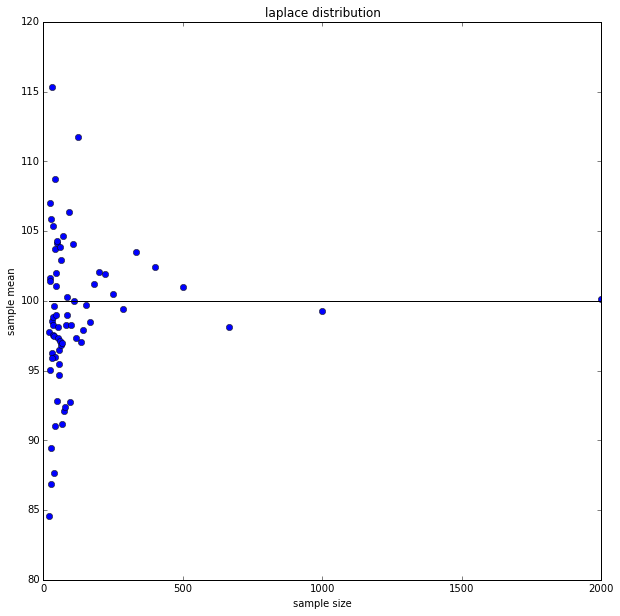

In [18]:
#plot the means for laplace
fig_mu_N4 = pl.figure(figsize = (10,10))
axlaplace_mu_n = fig_mu_N4.add_subplot(111)
for nn in md['laplace'].iterkeys():
    means['laplace'][nn] = md['laplace'][nn].mean()
    axlaplace_mu_n.plot(nn, means['laplace'][nn], 'ob')
    axlaplace_mu_n.set_xlabel('sample size')
    axlaplace_mu_n.set_ylabel('sample mean')
    axlaplace_mu_n.set_title('laplace distribution')
    axlaplace_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

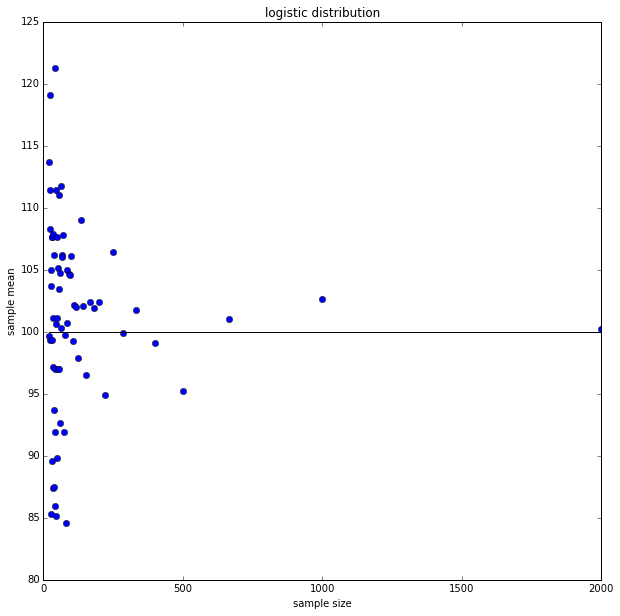

In [19]:
#plot the means for logistic
fig_mu_N5 = pl.figure(figsize = (10,10))
axlog_mu_n = fig_mu_N5.add_subplot(111)
for nn in md['logistic'].iterkeys():
    means['logistic'][nn] = md['logistic'][nn].mean()
    axlog_mu_n.plot(nn, means['logistic'][nn], 'ob')
    axlog_mu_n.set_xlabel('sample size')
    axlog_mu_n.set_ylabel('sample mean')
    axlog_mu_n.set_title('logistic distribution')
    axlog_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

##Note regarding the plots above (Sample Mean vs Sample Size):  
##I expected that as the sample size increased the sample mean would be 
##closer to 100 (the population mean set above).  
##Each of these plots indicates something similar to that.  The reason
##I believe this would be true is with more data points in a sample 
##(or the larger the sample size) the more likely that the variations in 
##values produced by the random functions will be counterbalanced by 
##variations to the other side of the mean (lower values balance with
##higher values)

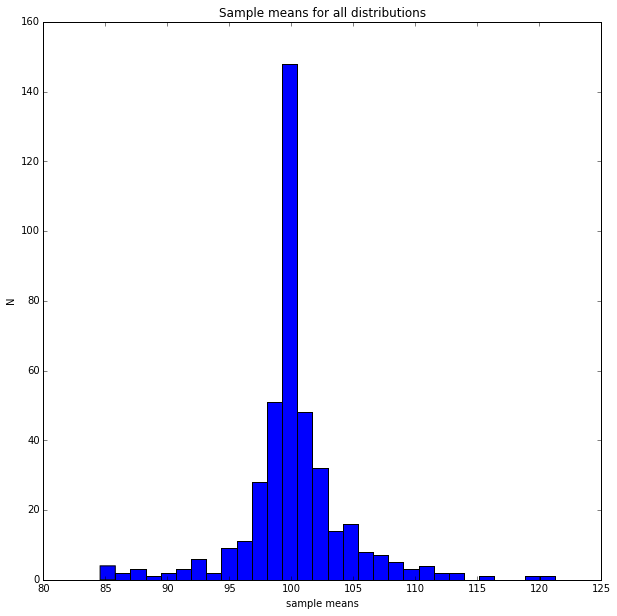

In [21]:
#create a histogram of the mean of all the samples for all distributions
allmeans = []
for n in means['chi2']:
    allmeans.append(means['chi2'][n])
for n in means['norml']:
    allmeans.append(means['norml'][n])
for n in means['poisson']:
    allmeans.append(means['poisson'][n])
for n in means['binomial']:
    allmeans.append(means['binomial'][n])
for n in means['laplace']:
    allmeans.append(means['laplace'][n])
for n in means['logistic']:
    allmeans.append(means['logistic'][n])
pl.figure(figsize = (10,10))
pl.hist(allmeans, bins = 30)
pl.xlabel('sample means')
pl.ylabel('N')
pl.title('Sample means for all distributions')